In [1]:
#load dependencies
import numpy as np
import pandas as pd 
import seaborn as sns 
sns.set_style('darkgrid')
import matplotlib.pyplot as plt

from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
#load training data 
titanic = pd.read_csv(r'C:\Users\den_admin\Desktop\Kaggle Challenge\titanic_kaggle_train.csv').set_index('PassengerId')

# 2. EDA

In [3]:
# #Auskunft über Kardinalität, Duplikate, Variablen, Missing Values
# from pandas_profiling import ProfileReport
# eda_report = ProfileReport(train)
# eda_report

In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
corr_matrix = titanic.corr()
#Korrelationen zwischen Features und Target
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

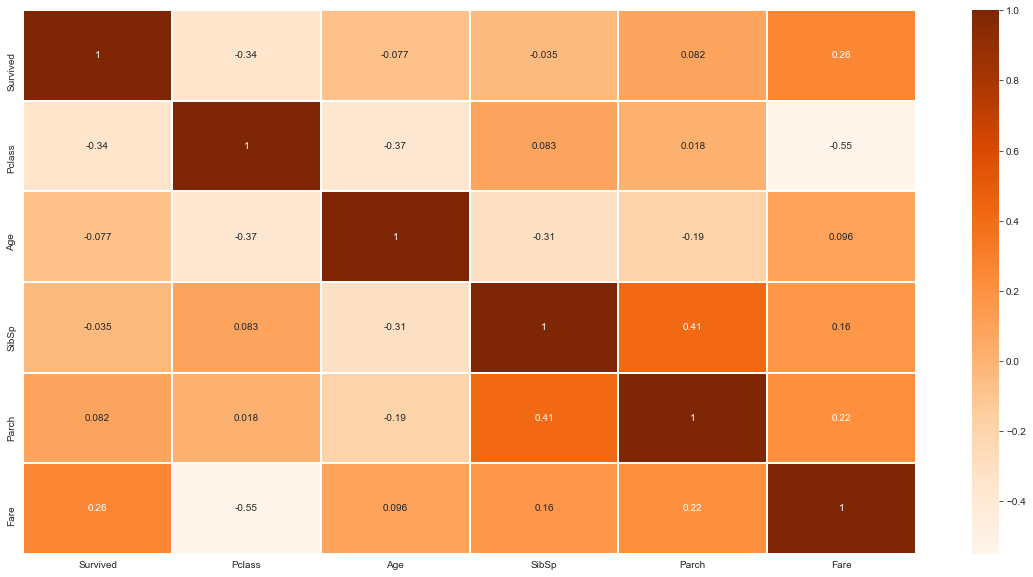

In [7]:
%matplotlib inline
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True, cmap = "Oranges", linewidths=1)
plt.show()

In [8]:
print("There are " + str(sum(titanic.isnull().any())) + " features with missing values in the dataset.")

There are 3 features with missing values in the dataset.


In [9]:
def check_cols_with_missing(df):
    
    null_types = df[list(df.isnull().any()[df.isnull().any()==True].index)].dtypes
    nulls = df.isnull().sum()[df.isnull().any()==True]
    
    df_output = pd.DataFrame({
        "null_types":null_types,
        "nulls":nulls})   

    return df_output

In [10]:
check_cols_with_missing(titanic)

,null_types,nulls
Age,float64,177
Cabin,object,687
Embarked,object,2


In [11]:
data_num = titanic.select_dtypes(include=["int64", "float64"]).copy()
data_cat = titanic.select_dtypes(exclude=["int64", "float64"]).copy()

In [12]:
data_num

,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,,
1,0,3,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,1,3,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
887,0,2,27.0,0,0,13.0000
888,1,1,19.0,0,0,30.0000
889,0,3,NaN,1,2,23.4500


# Cleaning and Preprocessing 

- Identifying Missing Data
    - Dealing with Missing Data (impute values)
    - Formatting the Data for Decision Trees
- Column Transformations as per categorical and numerical variables (Label Encoding etc.)
- Splitting data into Dependent and Independent Variables


## Pclass

In [13]:
dummies = pd.get_dummies(titanic['Pclass'], columns=['Pclass'], prefix='Class is')

In [14]:
titanic = titanic.join(dummies)
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,0,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,0,0,1


## Age

In [15]:
# replace missing age values with median age per PClass because Age correlates with Pclass and Survived
age_by_pclass_sex = titanic.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(titanic['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [16]:
titanic['Age'] = titanic.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [17]:
titanic.Age = titanic.Age.apply(int)

In [18]:
titanic['Age'] = pd.qcut(titanic['Age'], 10)

Text(0.5, 1.05, 'Survival Counts in Age Feature')

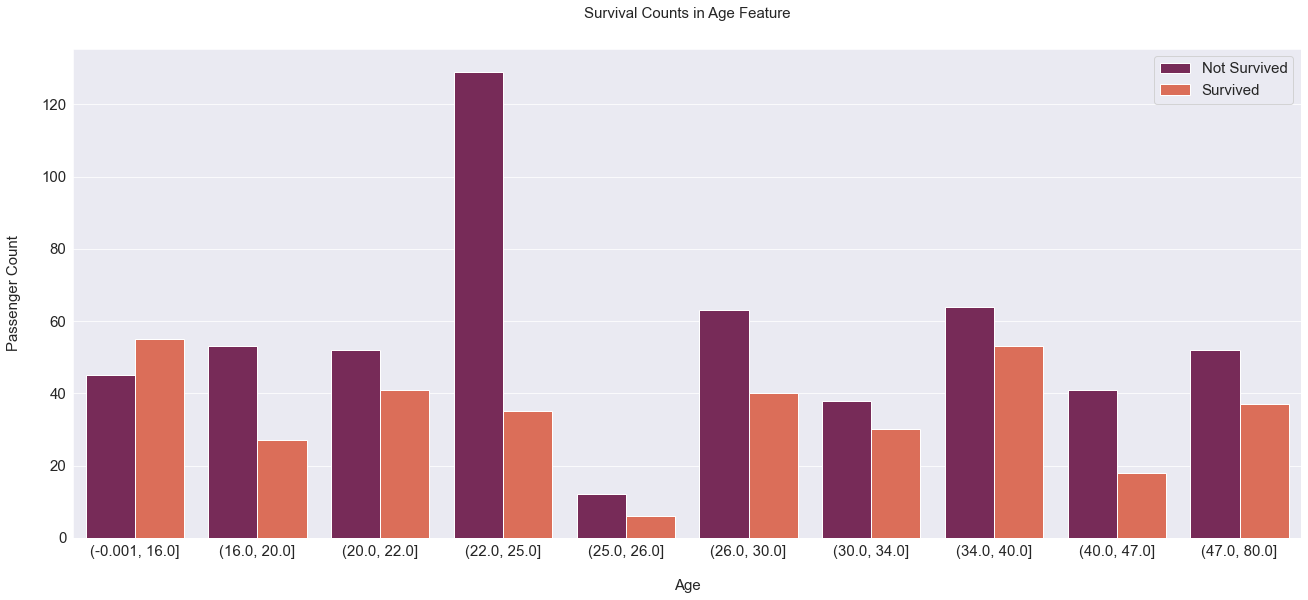

In [19]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Age', hue='Survived', palette = "rocket", data=titanic)

plt.xlabel('Age', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Counts in {} Feature'.format('Age'), size=15, y=1.05)


In [20]:
label = LabelEncoder()

titanic['Age_cat'] = label.fit_transform(titanic['Age'])
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3,Age_cat
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,"(20.0, 22.0]",1,0,A/5 21171,7.2500,NaN,S,0,0,1,2
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",1,0,PC 17599,71.2833,C85,C,1,0,0,7
3,1,3,"Heikkinen, Miss. Laina",female,"(25.0, 26.0]",0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,4
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",1,0,113803,53.1000,C123,S,1,0,0,7
5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",0,0,373450,8.0500,NaN,S,0,0,1,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,"(26.0, 30.0]",0,0,211536,13.0000,NaN,S,0,1,0,5
888,1,1,"Graham, Miss. Margaret Edith",female,"(16.0, 20.0]",0,0,112053,30.0000,B42,S,1,0,0,1
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(20.0, 22.0]",1,2,W./C. 6607,23.4500,NaN,S,0,0,1,2


## SibSp und Parch

In [21]:
titanic['Parch'].value_counts()

0    678
1    118
2     80
3      5
5      5
4      4
6      1
Name: Parch, dtype: int64

In [22]:
titanic['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
#family
titanic['Family'] = titanic['Parch'] + titanic['SibSp'] + 1

In [24]:
titanic.drop(columns=["SibSp","Parch"], inplace=True)

<AxesSubplot:xlabel='Survived', ylabel='count'>

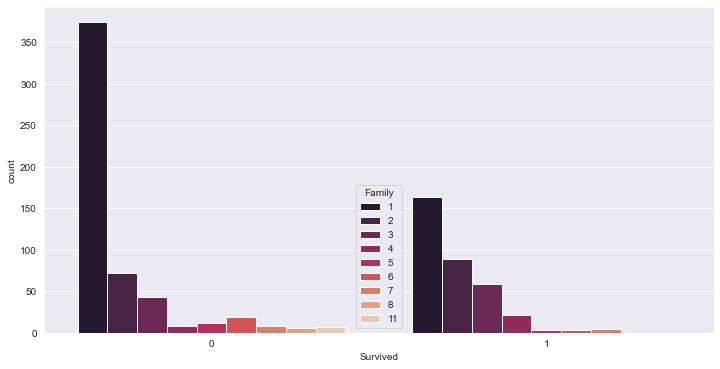

In [25]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Survived", hue = "Family", palette = "rocket", data = titanic)

<AxesSubplot:title={'center':'Survived by family size (%)'}, xlabel='Family'>

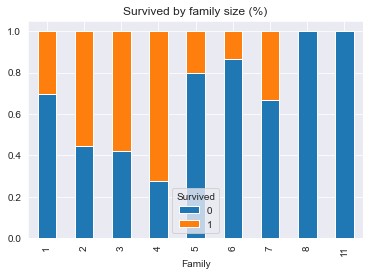

In [26]:
pd.crosstab(titanic['Family'], titanic['Survived'], normalize='index').plot(kind='bar', stacked=True, title="Survived by family size (%)")

In [27]:
family_map = {1: 'Alone', 2: 'Small', 3: 'Small', 4: 'Small', 5: 'Medium', 6: 'Medium', 7: 'Large', 8: 'Large', 11: 'Large'}
titanic['Famsize_Grouped'] = titanic['Family'].map(family_map)

In [28]:
titanic['Famsize_cat'] = label.fit_transform(titanic['Famsize_Grouped'])
titanic

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3,Age_cat,Family,Famsize_Grouped,Famsize_cat
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,"(20.0, 22.0]",A/5 21171,7.2500,NaN,S,0,0,1,2,2,Small,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",PC 17599,71.2833,C85,C,1,0,0,7,2,Small,3
3,1,3,"Heikkinen, Miss. Laina",female,"(25.0, 26.0]",STON/O2. 3101282,7.9250,NaN,S,0,0,1,4,1,Alone,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",113803,53.1000,C123,S,1,0,0,7,2,Small,3
5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",373450,8.0500,NaN,S,0,0,1,7,1,Alone,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,"(26.0, 30.0]",211536,13.0000,NaN,S,0,1,0,5,1,Alone,0
888,1,1,"Graham, Miss. Margaret Edith",female,"(16.0, 20.0]",112053,30.0000,B42,S,1,0,0,1,1,Alone,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(20.0, 22.0]",W./C. 6607,23.4500,NaN,S,0,0,1,2,4,Small,3


## Fare

In [29]:
titanic['Fare'] = pd.qcut(titanic['Fare'], 10)

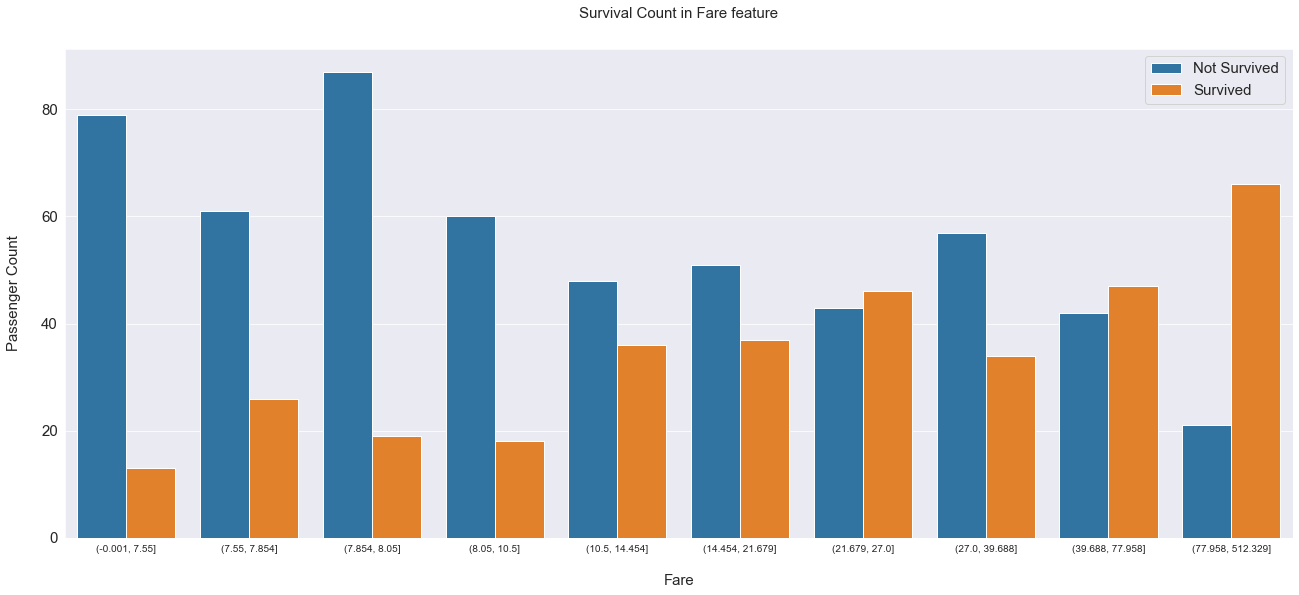

In [30]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Fare', hue='Survived', data=titanic)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Survival Count in {} feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [31]:
titanic['Fare_cat'] = label.fit_transform(titanic['Fare'])
titanic

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3,Age_cat,Family,Famsize_Grouped,Famsize_cat,Fare_cat
PassengerId,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,"(20.0, 22.0]",A/5 21171,"(-0.001, 7.55]",NaN,S,0,0,1,2,2,Small,3,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,"(34.0, 40.0]",PC 17599,"(39.688, 77.958]",C85,C,1,0,0,7,2,Small,3,8
3,1,3,"Heikkinen, Miss. Laina",female,"(25.0, 26.0]",STON/O2. 3101282,"(7.854, 8.05]",NaN,S,0,0,1,4,1,Alone,0,2
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,"(34.0, 40.0]",113803,"(39.688, 77.958]",C123,S,1,0,0,7,2,Small,3,8
5,0,3,"Allen, Mr. William Henry",male,"(34.0, 40.0]",373450,"(7.854, 8.05]",NaN,S,0,0,1,7,1,Alone,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,"(26.0, 30.0]",211536,"(10.5, 14.454]",NaN,S,0,1,0,5,1,Alone,0,4
888,1,1,"Graham, Miss. Margaret Edith",female,"(16.0, 20.0]",112053,"(27.0, 39.688]",B42,S,1,0,0,1,1,Alone,0,7
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,"(20.0, 22.0]",W./C. 6607,"(21.679, 27.0]",NaN,S,0,0,1,2,4,Small,3,6


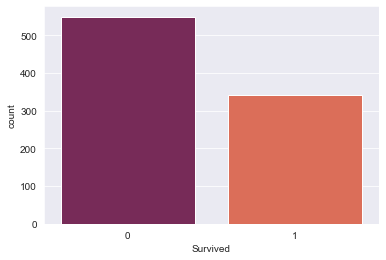

0    549
1    342
Name: Survived, dtype: int64


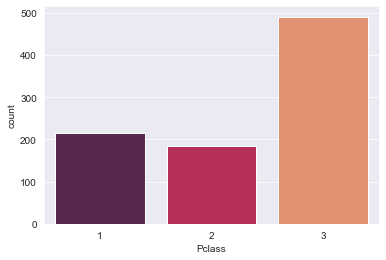

3    491
1    216
2    184
Name: Pclass, dtype: int64


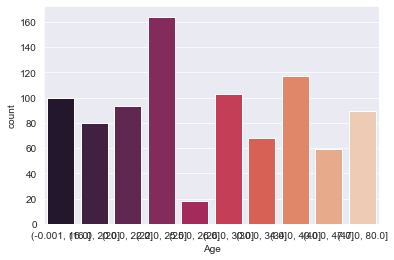

(22.0, 25.0]      164
(34.0, 40.0]      117
(26.0, 30.0]      103
(-0.001, 16.0]    100
(20.0, 22.0]       93
(47.0, 80.0]       89
(16.0, 20.0]       80
(30.0, 34.0]       68
(40.0, 47.0]       59
(25.0, 26.0]       18
Name: Age, dtype: int64


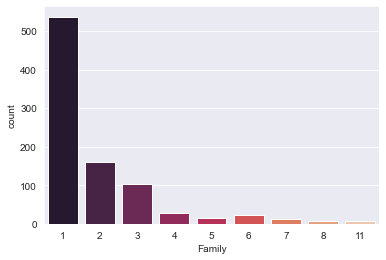

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: Family, dtype: int64


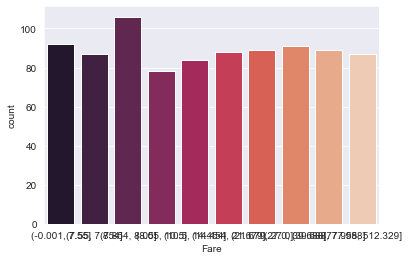

(7.854, 8.05]        106
(-0.001, 7.55]        92
(27.0, 39.688]        91
(21.679, 27.0]        89
(39.688, 77.958]      89
(14.454, 21.679]      88
(7.55, 7.854]         87
(77.958, 512.329]     87
(10.5, 14.454]        84
(8.05, 10.5]          78
Name: Fare, dtype: int64


In [32]:
#checking numericals after preprocessing 
a = ['Survived', 'Pclass', 'Age', 'Family', 'Fare']

for i in a:
    sns.countplot(x=i, data=titanic, palette="rocket")
    plt.show()
    print(titanic[i].value_counts())

In [33]:
data_cat

,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,
1,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
887,"Montvila, Rev. Juozas",male,211536,NaN,S
888,"Graham, Miss. Margaret Edith",female,112053,B42,S
889,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S


## Name

In [34]:
titanic['name_title'] = titanic.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [35]:
titanic['name_title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
the Countess      1
Jonkheer          1
Don               1
Lady              1
Mme               1
Ms                1
Capt              1
Sir               1
Name: name_title, dtype: int64

In [36]:
titanic['name_title'] = titanic['name_title'].replace(['Miss', 'Mrs','Ms', 'Mlle', 'Lady', 'Mme', 'the Countess', 'Dona'], 'Miss/Mrs/Ms')
titanic['name_title'] = titanic['name_title'].replace(['Dr', 'Col', 'Major', 'Jonkheer', 'Capt', 'Sir', 'Don', 'Rev'], 'Highly Educated/Military')

In [37]:
titanic['name_title'].value_counts()

Mr                          517
Miss/Mrs/Ms                 313
Master                       40
Highly Educated/Military     21
Name: name_title, dtype: int64

In [38]:
Prefix_mapping = {"Mr":0, "Master":1, "Highly Educated/Military":2, "Miss/Mrs/Ms":3}
for data in titanic:
    titanic["Prefix"] = titanic["name_title"].map(Prefix_mapping)

## Sex

In [39]:
titanic['Sex'].replace(['male','female'],[0,1],inplace=True)

## Ticket

In [40]:
titanic.drop(columns = "Ticket", inplace = True)

## Cabin

In [41]:
titanic['Cabin'].fillna(0)
titanic['Cabin'] = titanic['Cabin'].notnull().astype('int')

## Embarked

In [42]:
titanic.value_counts('Embarked')

Embarked
S    644
C    168
Q     77
dtype: int64

In [43]:
#googled their names, Miss Amelie Icard was the maid of Mrs. Stone who both boarded the Titanic in Southhampton, according to PClass they could have boarded the ship in S or C and according to fares, the 80 Dollar ones where closer to the prices paid in Cherbourg
titanic[titanic['Embarked'].isnull()]

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3,Age_cat,Family,Famsize_Grouped,Famsize_cat,Fare_cat,name_title,Prefix
PassengerId,,,,,,,,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",1,"(34.0, 40.0]","(77.958, 512.329]",1,NaN,1,0,0,7,1,Alone,0,9,Miss/Mrs/Ms,3
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,"(47.0, 80.0]","(77.958, 512.329]",1,NaN,1,0,0,9,1,Alone,0,9,Miss/Mrs/Ms,3


In [44]:
#with this information, missing values are filled with S
titanic['Embarked'] = titanic['Embarked'].fillna('S')

In [45]:
titanic['Embarked'].replace(['S','C','Q'],[1,2,3],inplace=True)

## Final DataFrame

In [46]:
titanic

,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Class is_1,Class is_2,Class is_3,Age_cat,Family,Famsize_Grouped,Famsize_cat,Fare_cat,name_title,Prefix
PassengerId,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",0,"(20.0, 22.0]","(-0.001, 7.55]",0,1,0,0,1,2,2,Small,3,0,Mr,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,"(34.0, 40.0]","(39.688, 77.958]",1,2,1,0,0,7,2,Small,3,8,Miss/Mrs/Ms,3
3,1,3,"Heikkinen, Miss. Laina",1,"(25.0, 26.0]","(7.854, 8.05]",0,1,0,0,1,4,1,Alone,0,2,Miss/Mrs/Ms,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,"(34.0, 40.0]","(39.688, 77.958]",1,1,1,0,0,7,2,Small,3,8,Miss/Mrs/Ms,3
5,0,3,"Allen, Mr. William Henry",0,"(34.0, 40.0]","(7.854, 8.05]",0,1,0,0,1,7,1,Alone,0,2,Mr,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",0,"(26.0, 30.0]","(10.5, 14.454]",0,1,0,1,0,5,1,Alone,0,4,Highly Educated/Military,2
888,1,1,"Graham, Miss. Margaret Edith",1,"(16.0, 20.0]","(27.0, 39.688]",1,1,1,0,0,1,1,Alone,0,7,Miss/Mrs/Ms,3
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,"(20.0, 22.0]","(21.679, 27.0]",0,1,0,0,1,2,4,Small,3,6,Miss/Mrs/Ms,3


In [47]:
titanic.drop(columns=['Pclass', 'Age', 'Fare', 'Family','Famsize_Grouped', 'Name', 'name_title', 'Cabin'], inplace=True)

In [48]:
#2
#titanic.drop(columns=['Pclass', 'Age', 'Fare', 'Family','Famsize_Grouped', 'Name', 'name_title', 'Cabin', 'Fare_cat', 'Prefix'], inplace=True)

In [49]:
titanic

,Survived,Sex,Embarked,Class is_1,Class is_2,Class is_3,Age_cat,Famsize_cat,Fare_cat,Prefix
PassengerId,,,,,,,,,,
1,0,0,1,0,0,1,2,3,0,0
2,1,1,2,1,0,0,7,3,8,3
3,1,1,1,0,0,1,4,0,2,3
4,1,1,1,1,0,0,7,3,8,3
5,0,0,1,0,0,1,7,0,2,0
...,...,...,...,...,...,...,...,...,...,...
887,0,0,1,0,1,0,5,0,4,2
888,1,1,1,1,0,0,1,0,7,3
889,0,1,1,0,0,1,2,3,6,3


## Assigning X and Y

In [50]:
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Modeling

- scaling
- Train/Test-Split
- Baseline Model: LogRe
    - RandomForest
    - Neural Net
- Evaluation
- Parameter Tuning 

In [51]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X.shape

(891, 9)

## Train Test Split 
with provided data, which was only the train set. So splitting this one first and later take on the testset by kaggle

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [54]:
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (623, 9) (623,)
Test set: (268, 9) (268,)


# Baseline Model: Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression

LogRe = LogisticRegression(solver='liblinear', random_state=123)
LogRe.fit(X_train, y_train)

LogisticRegression(random_state=123, solver='liblinear')

In [56]:
y_pred = LogRe.predict(X_test)

In [57]:
y_train_pred = LogRe.predict(X_train)

In [58]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8022388059701493

In [59]:
accuracy_score(y_train,y_train_pred)

0.7913322632423756

<AxesSubplot:>

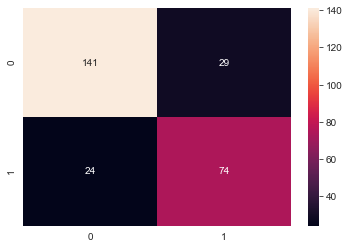

In [69]:
from sklearn.metrics import confusion_matrix # to create a confusion matrix
from sklearn.metrics import plot_confusion_matrix # to draw a confusion matrix
from sklearn import metrics

#plot_confusion_matrix(LogRe, X_test, y_test, display_labels=LogRe.classes_)
matrix_logre = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(matrix_logre, annot = True,fmt = 'g')

In [70]:
y_compare = pd.DataFrame(y_test)
y_compare

,Survived
PassengerId,
173,1
525,0
453,0
171,0
621,0
...,...
373,0
120,0
418,1


In [71]:
y_compare['y_pred'] = y_pred
y_compare

,Survived,y_pred
PassengerId,,
173,1,1
525,0,0
453,0,0
171,0,0
621,0,0
...,...,...
373,0,0
120,0,1
418,1,1


In [72]:
from sklearn.metrics import mean_absolute_error, accuracy_score, classification_report
mae = mean_absolute_error(y_test, y_pred)
mae

0.19776119402985073

In [73]:
accuracy_score(y_test, y_pred)

0.8022388059701493

In [74]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       170
           1       0.72      0.76      0.74        98

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [75]:
# printing confision matrix
pd.DataFrame(confusion_matrix(y_test,y_pred),\
            columns=["Predicted Not-Survived", "Predicted Survived"],\
            index=["Not-Survived","Survived"] )

,Predicted Not-Survived,Predicted Survived
Not-Survived,141,29
Survived,24,74


0.8619447779111644


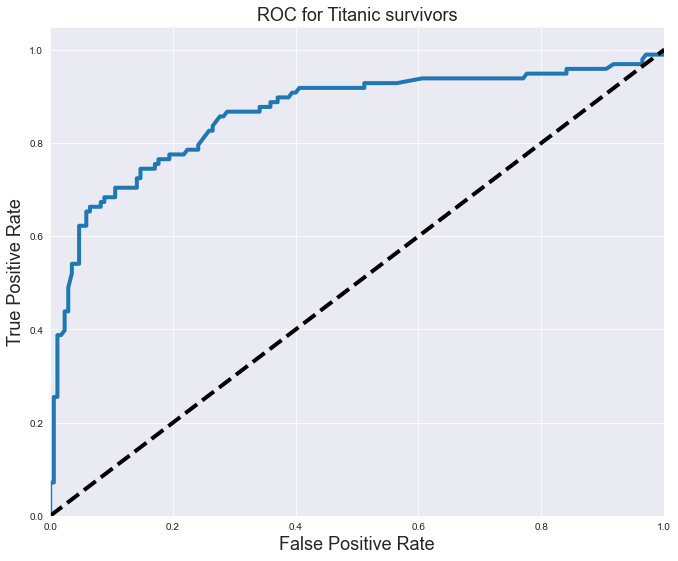

In [76]:
from sklearn.metrics import roc_curve, auc

y_score = LogRe.decision_function(X_test)

FPR, TPR, _ = roc_curve(y_test, y_score)
ROC_AUC = auc(FPR, TPR)
print (ROC_AUC)

plt.figure(figsize =[11,9])
plt.plot(FPR, TPR, label= 'ROC curve(area = %0.2f)'%ROC_AUC, linewidth= 4)
plt.plot([0,1],[0,1], 'k--', linewidth = 4)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC for Titanic survivors', fontsize= 18)
plt.show()

# Neural Network (Simple Sequential Model)

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model, Sequential 
from tensorflow.keras.optimizers import RMSprop, Adamax, Adam
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization, Input
from tensorflow.keras import regularizers, optimizers


from tensorflow.keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import BinaryCrossentropy

In [78]:
print(X.shape)
print(y.shape)

(891, 9)
(891,)


In [79]:
X_train = np.array(X_train)

In [80]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(9,), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 

# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics='accuracy')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                160       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 449
Trainable params: 449
Non-trainable params: 0
_________________________________________________________________


In [81]:
history = model.fit(X_train,
                    y_train,
                    epochs=80, 
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Epoch 1/80
50/50 [==============================] - 1s 5ms/step - loss: 0.5999 - accuracy: 0.6787 - val_loss: 0.6249 - val_accuracy: 0.6240
Epoch 2/80
50/50 [==============================] - 0s 2ms/step - loss: 0.5476 - accuracy: 0.7068 - val_loss: 0.5902 - val_accuracy: 0.6560
Epoch 3/80
50/50 [==============================] - 0s 2ms/step - loss: 0.5199 - accuracy: 0.7249 - val_loss: 0.5667 - val_accuracy: 0.6720
Epoch 4/80
50/50 [==============================] - 0s 2ms/step - loss: 0.4987 - accuracy: 0.7470 - val_loss: 0.5460 - val_accuracy: 0.7360
Epoch 5/80
50/50 [==============================] - 0s 3ms/step - loss: 0.4830 - accuracy: 0.7711 - val_loss: 0.5247 - val_accuracy: 0.7520
Epoch 6/80
50/50 [==============================] - 0s 3ms/step - loss: 0.4704 - accuracy: 0.7751 - val_loss: 0.5107 - val_accuracy: 0.7680
Epoch 7/80
50/50 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7771 - val_loss: 0.4975 - val_accuracy: 0.7680
Epoch 8/80
50/50 [==

In [82]:
predict = model.predict(X_train)

In [83]:
predict

array([[9.51151133e-01],
       [9.32522774e-01],
       [5.06091714e-01],
       [3.21792930e-01],
       [1.28785968e-02],
       [9.89645243e-01],
       [7.11343288e-02],
       [8.83860707e-01],
       [7.47540534e-01],
       [6.17395043e-01],
       [7.89727271e-02],
       [1.22511238e-01],
       [9.46285069e-01],
       [7.08865821e-02],
       [1.09839439e-02],
       [9.89546180e-01],
       [1.33958161e-02],
       [9.13260579e-01],
       [7.92892873e-02],
       [2.77246833e-01],
       [7.92892873e-02],
       [9.78676915e-01],
       [2.63778895e-01],
       [6.17395043e-01],
       [3.93304229e-02],
       [2.46318787e-01],
       [1.64463997e-01],
       [7.91701496e-01],
       [7.89727271e-02],
       [1.79474503e-01],
       [9.51391757e-02],
       [7.89536119e-01],
       [9.67028797e-01],
       [1.02824271e-02],
       [2.08427489e-01],
       [9.12594795e-01],
       [9.16250706e-01],
       [1.27689421e-01],
       [1.40546620e-01],
       [9.66622531e-02],


In [84]:
from sklearn import metrics
y_pred = (predict > 0.5).astype(int)

In [85]:
y_pred

array([[1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [86]:
y_train

PassengerId
417    1
802    1
513    1
456    1
758    0
      ..
99     1
323    1
383    0
366    0
511    1
Name: Survived, Length: 623, dtype: int64

In [87]:
y_train = np.array(y_train)

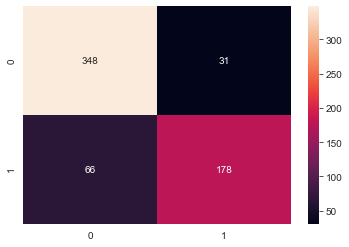

In [88]:
matrix = metrics.confusion_matrix(y_train, y_pred)
sns.heatmap(matrix, annot = True,fmt = 'g')
plt.show()